# <center> Статистический анализ данных

Данные сервиса проката самокатов
* Загрузить, обработать данные, выявить аномалии и установить связи если есть.
* Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
* Сделать выводы по по результатам

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

### Шаг 1. Загрузка данных

In [2]:
print("Данные о пользователях")
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
display(data_users.head(10))
data_users.info()
print()
print('Число дубликатов в таблице = ',data_users.duplicated().sum())
;

Данные о пользователях


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

Число дубликатов в таблице =  31


''

In [3]:
print("Данные о поездках")
try:
    data_rides = pd.read_csv('/datasets/rides_go.csv',parse_dates=['date'])
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv',parse_dates=['date'])
display(data_rides.head(10))
data_rides.info()
print()
print('Число дубликатов в таблице = ',data_rides.duplicated().sum())
;

Данные о поездках


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB

Число дубликатов в таблице =  0


''

In [4]:
print("Данные о подписках")
try:
    data_subs = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
display(data_subs.head(10))
data_subs.info()
print()
print('Число дубликатов в таблице = ',data_subs.duplicated().sum())
;

Данные о подписках


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes

Число дубликатов в таблице =  0


''

- Для анализа исходных данных построим некоторые графики

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

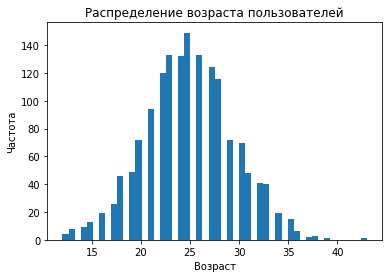

''

In [5]:
# В первой таблице в виде графика можем изучить возраст пользователей
display(data_users['age'].describe())
plt.hist(data_users['age'], bins = 50)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()
;

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

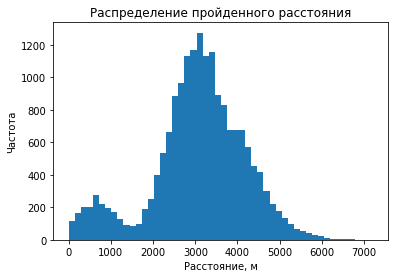

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

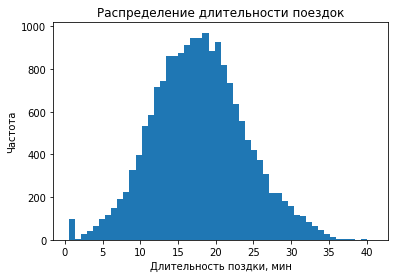

/tmp/ipykernel_115/3907868911.py:15: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(data_rides['date'].describe())


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

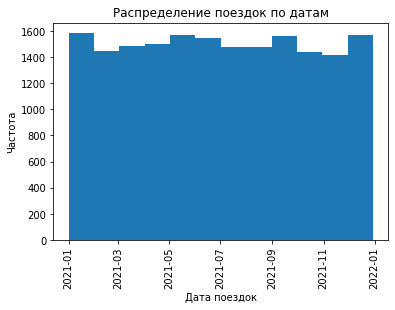

''

In [6]:

display(data_rides['distance'].describe())
plt.hist(data_rides['distance'], bins = 50)
plt.title('Распределение пройденного расстояния')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.show()

display(data_rides['duration'].describe())
plt.hist(data_rides['duration'], bins = 50)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поздки, мин')
plt.ylabel('Частота')
plt.show()

display(data_rides['date'].describe())
plt.hist(data_rides['date'], bins = 12)
plt.title('Распределение поездок по датам')
plt.xlabel('Дата поездок')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.show()
;

Вывод:

    Загрузили 3 таблицы с данными,
- data_users 1565 записи, 5 столбцов, пропуски отсутствуют, количество явных дубликатов 31.
- data_rides 18068 записи, 4 столбца, пропуски отсутствуют, явных дубликатов нет.
- data_subs 2 записи, 4 столбца,  пропуски отсутствуют, явных дубликатов нет. 

Визуализировали некоторые данные из таблиц, по предварительной оценке сильных искажающих факторов и аномалий не обнаружили.
Данных достаточно для исследования.

### Шаг 2. Предобработка данных

In [7]:
# Удалим пустые строки так как их мало, на результат это не повлияет
data_users = data_users.drop_duplicates().reset_index(drop=True)
data_users.duplicated().sum()

0

In [8]:
data_rides['month'] = data_rides['date'].dt.month
data_rides['month']
;

''

    Вывод:
Выполнили предобработку данных

В данных таблицах отсутствуют пропуски
- В данных data_users - Удалили дубликаты
- В данных data_rides -  Создали новый столбец с номером месяца из date
- в данных date_subs - Изменений не проводили

### Шаг 3. Исследовательский анализ данных

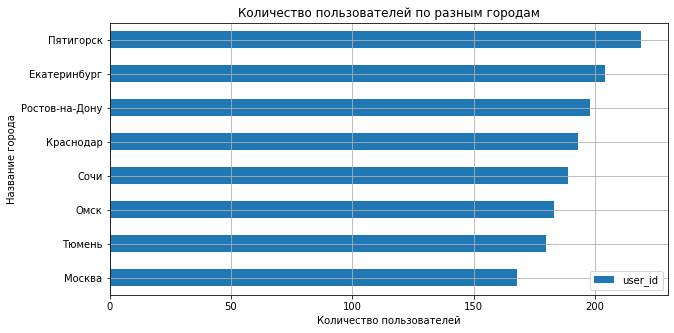

Количество пользователей по городам 


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


''

In [9]:
(
    data_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по разным городам')
plt.ylabel('Название города')
plt.xlabel('Количество пользователей')
plt.show()
print('Количество пользователей по городам ') 
display(data_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False))
;

Вывод:

    можем сделать некоторые выводы по распределению пользователей по городам,
    
- больше всего пользователей в Пятигорске на 2 месте Екатеринбург, дальше Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень и на последнем месте с большим отрывом от предпоследнего Москва,
- наблюдаем тенденцию большого количества пользователей в южных городах, что связано с длительностью сезона проката, за исключением Екатеринбурга
- в Москве ситуация может быть обусловлена большей конкуренцией разных прокатных организаций, также наличием более развитой пасажирской логистики

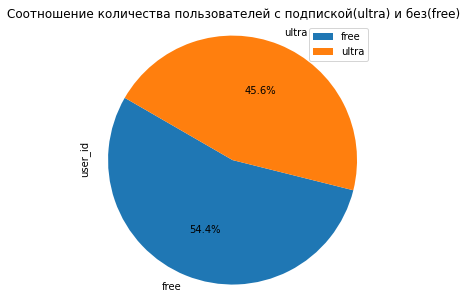

''

In [10]:
(
    data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(5,5), 
    autopct='%1.1f%%', startangle=150,
    title='Соотношение количества пользователей с подпиской(ultra) и без(free)')

)
plt.axis('equal')
plt.show()
;

Вывод:

- Количество пользователей без подписки превышает количество пользователей с подпиской на 8.8%

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

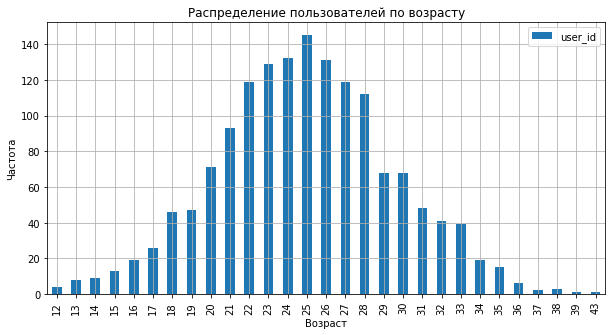

In [11]:
(
    data_users.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
display(data_users['age'].describe())
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


Вывод:
-  Гистограмма количества пользователей по возрастам показывает, что средний возраст пользователей 24.9, а медиана 25 лет, что говорит об отсутствии явных аномалий и близости к нормальному распределению



count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

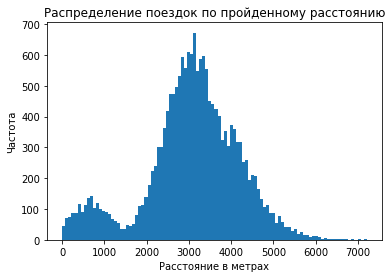

''

In [12]:
display(data_rides['distance'].describe())
plt.hist(data_rides['distance'], bins=100, range=(1,7212))
plt.title('Распределение поездок по пройденному расcтоянию')
plt.xlabel('Расcтояние в метрах')
plt.ylabel('Частота')
plt.show()
;

In [13]:
data_anom = data_rides.query('0<distance<1500')
data_anom.head(10)

,user_id,distance,duration,date,month
2,1,754.159807,6.232113,2021-04-20,4
9,1,748.690645,15.041884,2021-11-22,11
20,2,923.007439,6.914760,2021-08-03,8
47,4,724.559572,11.811399,2021-11-14,11
91,9,979.657684,17.521497,2021-03-08,3
100,10,680.952663,5.150377,2021-02-21,2
105,10,1409.589386,15.020549,2021-07-02,7
121,12,1236.815996,9.710448,2021-08-07,8
132,13,1158.851148,7.345692,2021-10-26,10
149,15,634.891669,15.809350,2021-04-05,4


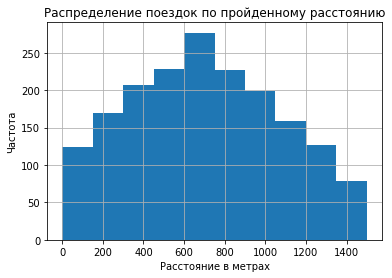

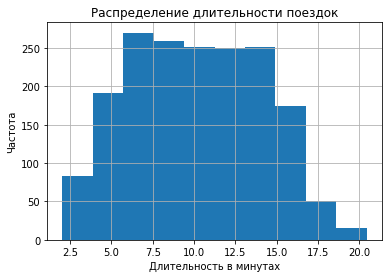

In [14]:
data_anom['distance'].hist()
plt.title('Распределение поездок по пройденному расcтоянию')
plt.xlabel('Расcтояние в метрах')
plt.ylabel('Частота')
plt.show()
data_anom['duration'].hist()
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность в минутах')
plt.ylabel('Частота')
plt.show()

 Вывод:
- Среднее значение пройденного расстояния равно 3070м, а медианное 3133м , первый квартиль - 2543м,  третий - 3776м
- Видим аномалию в пределах от 0-1500 м, исключить эти данные мы не можем будем анализировать и искать причины

Дополнительно построил, графики для интервала 0-1500, видим что средняя скорость не превышает 2-8 км\ч, а пройденное расстояние 400-800м, похоже на то, что самокаты были неисправны или разряжены, также люди могли взять самокат впервые для того чтобы просто попробовать

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

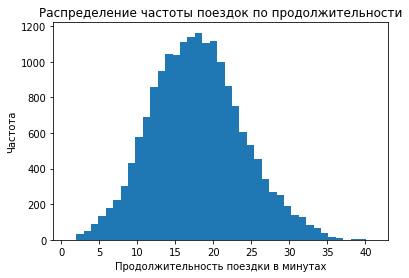

''

In [15]:
display(data_rides['duration'].describe())
plt.hist(data_rides['duration'], bins=41, range=(1,41))
plt.title('Распределение частоты поездок по продолжительности')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Частота')
plt.show()
;

Вывод:
- средняя продолжительность поездки 17.8 минут , меданная 17.7 минут, значения довольно близкие , что также говорит о нормальности распределния, первый квартиль - 13.6 минут, третий - 21.8 минут 


- Зная пройденной расстояние и время, можем посчитать среднюю скорость движения, что может дать дополнительную информацию

count    18068.000000
mean        13.785261
std         44.156189
min          0.005133
25%          8.127843
50%         10.251135
75%         12.929800
max        865.320929
Name: velocity, dtype: float64

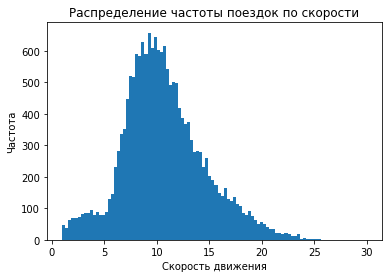

''

In [16]:
# Расчитаем среднюю скорость движения км/ч
data_rides['velocity'] = (data_rides['distance']/1000)/(data_rides['duration']/60)
display(data_rides['velocity'].describe())
plt.hist(data_rides['velocity'], bins=100, range=(1,30))
plt.title('Распределение частоты поездок по скорости')
plt.xlabel('Скорость движения')
plt.ylabel('Частота')
plt.show()
;

Вывод:
- средняя скорость поездки 13.8 км/ч , меданная 10.3 км/ч, на графике также проявилась аномалия в области 0-5 км/ч, первый квартиль - 8.1 км/ч, третий - 12.9 км/ч 


In [17]:
data_ano = data_rides.query('velocity>30')
data_ano.head(10)

,user_id,distance,duration,date,month,velocity
6531,701,4196.445201,0.5,2021-08-31,8,503.573424
6570,704,4830.824371,0.5,2021-10-14,10,579.698925
6680,712,4684.004397,0.5,2021-03-04,3,562.080528
6695,713,5215.642710,0.5,2021-02-25,2,625.877125
6768,718,5197.436649,0.5,2021-02-11,2,623.692398
6860,724,6225.520342,0.5,2021-12-16,12,747.062441
6883,726,4452.491518,0.5,2021-03-01,3,534.298982
7018,735,4406.954812,0.5,2021-04-13,4,528.834577
7160,745,5286.167732,0.5,2021-08-17,8,634.340128
7364,760,4881.391865,0.5,2021-08-29,8,585.767024


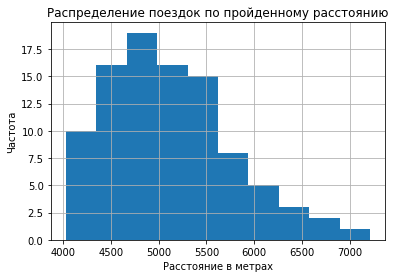

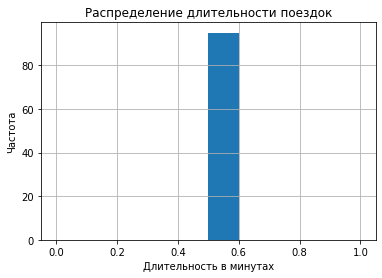

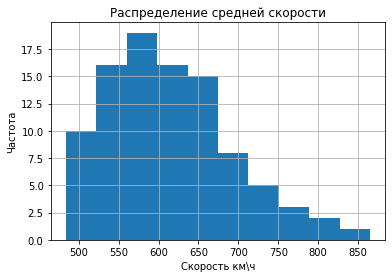

In [18]:
data_ano['distance'].hist()
plt.title('Распределение поездок по пройденному расcтоянию')
plt.xlabel('Расcтояние в метрах')
plt.ylabel('Частота')
plt.show()
data_ano['duration'].hist()
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность в минутах')
plt.ylabel('Частота')
plt.show()
data_ano['velocity'].hist()
plt.title('Распределение средней скорости')
plt.xlabel('Скорость км\ч')
plt.ylabel('Частота')
plt.show()

Вывод: проанализировал аномальные значения скорости, обнаружил проблему с недостоверными данными длительности поездки = 0,5 
Связано с ошибкой при логировании данных

Вывод по исследовательскму анализу


-  Арендой самокатов пользуются больше всего в южных городах, в которых сезон проката больше, на второй позиции оказался уральский город Екатеринбург, возможно связано с проблемами с ообщественным транспортом или образом жизни людей.

- Число пользователей без подписки (free) - 54,4% превышает количество пользователей с подпиской (ultra) 45,6% на 8.8%. 

- Средний возраст пользователей распределен нормально с медианой примерно в 25 лет, средний возраст и медиана практически совпадают.

- Среднее значение пройденного расстояния равно 3070м, а медианное 3133м , первый квартиль - 2543м,  третий - 3776м, видим аномалию в пределах от 0-1500 м, исключить эти данные мы не можем будем анализировать и искать причины

- Средняя продолжительность поездки 17.8 минут , меданная 17.7 минут, значения довольно близкие , что также говорит о нормальности распределния, первый квартиль - 13.6 минут, третий - 21.8 минут 

Также рассчитали среднюю скорость поездки построили график распределения: 
- средняя скорость поездки 13.8 км/ч , меданная 10.3 км/ч, на графике также проявилась аномалия в области 0-5 км/ч, первый квартиль - 8.1 км/ч, третий - 12.9 км/ч 



Все данные близки к нормальному распределению, есть некоторая аномалия в области данных по дистанции (0-1500),  видим что средняя скорость не превышает 2-8 км\ч, а пройденное расстояние 400-800м, похоже на то, что самокаты были неисправны или разряжены, также люди могли взять самокат впервые для того чтобы просто попробовать

Проанализировал аномальные значения скорости, обнаружил проблему с недостоверными данными длительности поездки = 0,5 
Связано с ошибкой при логировании данных

### Шаг 4. Объединение данных

In [19]:
# Cшиваем датасеты в единый 
all_data = data_users.merge(data_rides)
all_data = all_data.merge(data_subs)
display(all_data.head(10))
;

,user_id,name,age,city,subscription_type,distance,duration,date,month,velocity,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,10.335841,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,9.929620,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,7.260713,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,8.734644,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,9.202888,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,9.985109,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,12.214811,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,7.376547,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,13.437490,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,2.986424,6,0,199


''

In [20]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
all_data['duration'] = np.ceil(all_data['duration'])

In [21]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
 5   velocity  18068 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 847.1 KB


In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   velocity           18068 non-null  float64       
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory 

После объединения таблиц количество данных не изменилось и пропусковв не появилось, 
объединение выполнено корректно

In [23]:
# создадим датасет с пользователями без подписки
free_subs = all_data.query("subscription_type == 'free'")
display(free_subs.head(10))
;

,user_id,name,age,city,subscription_type,distance,duration,date,month,velocity,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,10.100278,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,3.130090,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,12.003323,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,7.396057,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,10.491519,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,23.0,2021-02-23,2,11.646997,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,19.0,2021-03-03,3,12.491950,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,16.0,2021-04-09,4,11.609352,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,17.0,2021-06-12,6,12.025079,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,12.0,2021-06-23,6,13.618322,8,50,0


''

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

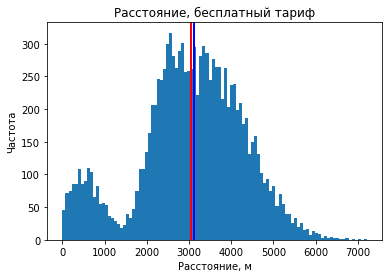

''

In [24]:
display(free_subs['distance'].describe())
plt.hist(free_subs['distance'], bins=100, range = (1, 7212))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.axvline(x=3045.49, ymin=0, ymax = 500, linewidth=2, color='red')
plt.axvline(x=3114.65, ymin=0, ymax = 500, linewidth=2, color='blue')
plt.show()
;

Вывод:
- Для бесплатного тарифа распределение похоже на распределение по всем данным медиана и среднее также близки к данным по всем подпискам, чуть более явная аномалия в интервале 0-1500м

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

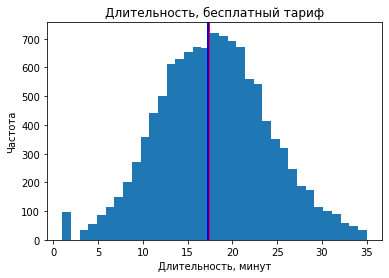

''

In [25]:
display(free_subs['duration'].describe())
plt.hist(free_subs['duration'], bins=35, range = (1, 35))
plt.title('Длительность, бесплатный тариф')
plt.xlabel('Длительность, минут')
plt.ylabel('Частота')
plt.axvline(x=17.39, ymin=0, ymax = 500, linewidth=2, color='red')
plt.axvline(x=17.32, ymin=0, ymax = 500, linewidth=2, color='blue')
plt.show()
;

Вывод:
- Для бесплатного тарифа распределение похоже на распределение по всем данным медиана и среднее также близки к данным по всем подпискам

In [26]:
# создадим датасет с пользователями с подпиской
ultra_subs = all_data.query("subscription_type == 'ultra'")
display(free_subs.head(10))
;

,user_id,name,age,city,subscription_type,distance,duration,date,month,velocity,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,10.100278,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,3.130090,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,12.003323,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,7.396057,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,10.491519,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,23.0,2021-02-23,2,11.646997,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,19.0,2021-03-03,3,12.491950,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,16.0,2021-04-09,4,11.609352,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,17.0,2021-06-12,6,12.025079,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,12.0,2021-06-23,6,13.618322,8,50,0


''

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

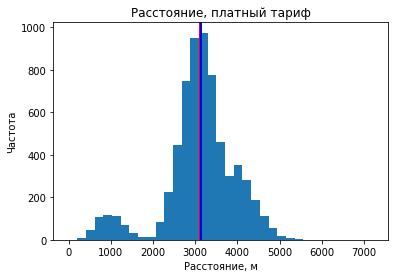

''

In [27]:
display(ultra_subs['distance'].describe())
plt.hist(ultra_subs['distance'], bins=35, range = (1, 7212))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.axvline(x=3115.4, ymin=0, ymax = 500, linewidth=2, color='red')
plt.axvline(x=3148.6, ymin=0, ymax = 500, linewidth=2, color='blue')
plt.show()
;

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

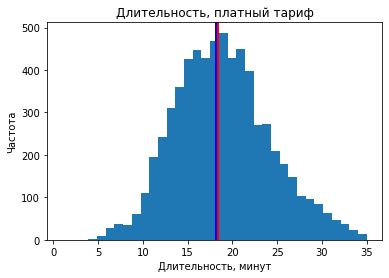

''

In [28]:
display(ultra_subs['duration'].describe())
plt.hist(ultra_subs['duration'], bins=35, range = (1, 35))
plt.title('Длительность, платный тариф')
plt.xlabel('Длительность, минут')
plt.ylabel('Частота')
plt.axvline(x=18.4, ymin=0, ymax = 500, linewidth=2, color='red')
plt.axvline(x=18.17, ymin=0, ymax = 500, linewidth=2, color='blue')
plt.show()
;

Вывод

- Объединили данные о пользователях, поездках и тарифах в один датафрейм - all_data.

- Создали еще два датафрейма на основе all_data:

free_subs - пользователи с бесплатным тарифом

ultra_subs - пользователи  с платным тарифом

- Визуализировали информацию о дистанции и времени поездки для каждого тарифа.

- Для бесплатного тарифа время поездки составляет от 13 до 22 минут, и проезжают от 2.3 до 3.9 км, есть пользователи.

- Платный тариф. В основном время укладывается в промежуток от 15 до 22 минут. Пик расстояния приходится от 2.7 3.5 км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе. Скорее всего пользователи с платной подпиской ездят постоянно по одним маршрутам не больше определенного комфортного для поездки расстояния, а по бесплатному тарифу могут ездить люди разово не прогнозируя точное время и длительность поездки

### Шаг 5. Подсчёт выручки



In [29]:
total_data = pd.pivot_table(all_data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})
display(total_data)
;

distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra
...                    ...       ...   ...               ...
12    1525     4597.854350      34.0     1              free
      1526     3644.121544      23.0     1              free
      1528     3998.569324      11.0     1              free
      1532     6111.889853      42.0     2              free
      1534     2371.711192      16.0     1              free

[11331 rows x 4 columns]

''

In [30]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
#total_data['duration'] = np.ceil(total_data['duration'])
# перенес на верх

In [31]:
total_data.query('user_id == 1')

,,distance,duration,name,subscription_type
month,user_id,,,,
1,1,7027.511294,42.0,2,ultra
4,1,754.159807,7.0,1,ultra
8,1,6723.470560,46.0,2,ultra
10,1,5809.911100,32.0,2,ultra
11,1,7003.499363,56.0,3,ultra
12,1,6751.629942,28.0,2,ultra


In [32]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['name']
    else:
        return 'Not sub'

In [33]:
total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)
display(total_data['revenue_per_month'].head(10))
;

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         409.0
       15         433.0
       20         373.0
       22         277.0
Name: revenue_per_month, dtype: float64

''

Вывод

- Создали новый датафрейм с данными total_data на основе датафрейма с объединенными данными.

Нашли суммарное расстояние, количество поездок и суммарную длительность поездок для каждого пользователя за каждый месяц. 
- Добавили столбец с ежемесячной выручкой, от каждого пользователя.

### Шаг 6. Проверка гипотез

#### Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

    H_0: Длительность поездок (duration) пользователей на подписке ultra = длительности поездок (duration) пользователей на подписке free
    H_1: Длительность поездок (duration) пользователей на подписке ultra > Длительность поездок (duration) пользователей на подписке free

In [34]:
results = st.ttest_ind(ultra_subs['duration'], 
                       free_subs['duration'],
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Вывод:
- отвергли гипотезу о том, что длительность поездки пользователей на тарифе ultra равно длительности поездки пользователей на тарифе free.

#### Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
   
    H_0: Расстояние (distance) пройденное пользователями на подписке ultra = 3130 метров
    H_1: Расстояние (distance) пройденное пользователями на подписке ultra < 3130 метров

In [35]:
dist_value = 3130.0
alpha = 0.05

results = st.ttest_1samp(
    ultra_subs['distance'], 
    dist_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Вывод:
- нельзя утверждать, что расстояние, которое проезжают пользователи на тарифе ultra равно 3130 метров.

#### Проверим гипотезу: ежемесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки
    H_0: Ежемесячная выручка revenue_per_month пользователей по подписке ultra = ежемесячной выручке revenue_per_month пользователей по подписке free
    H_1: Ежемесячная выручка revenue_per_month пользователей на подписке ultra > ежемесячной выручке revenue_per_month пользователей на подписке free

In [36]:
results = st.ttest_ind(total_data.query('subscription_type == "ultra"')['revenue_per_month'], 
                       total_data.query('subscription_type == "free"')['revenue_per_month'],
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод:
- можно утверждать, что ежемесячная выручка с пользователей по подписке ultra превышает ежемесячную выручку с пользователей по подписке free

####  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых парных выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2

H1 : μ1 != μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Необходимо применение метода scipy.stats.ttest_rel()

Если требования к зависимым выборкам не выполняются, можно воспользоваться методом scipy.stats.ttest_ind().

- Нулевая гипотеза формулирует, что количество обращений не изменилось,
альтернативная что изменилось в любую сторону, выделенный фрагмент указывает изменения в какую сторону нас интересуют

#### Вывод по проверке гипотез

- Нулевая гипотеза отвергнута, средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при уровне значимости в 5 %.

- Нулевую гипотезу неудалось отвергнуть, содно утверждать что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката, при уровне значимости в 5 %.

- Нулевую гипотезу отвергаем, средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки, при уровне значимости в 5 %.

- Необходимо применение метода scipy.stats.ttest_rel(), для сравнения зависимых выборок, удовлетворяющих условию что, переменная измеряется дважды (количество обращений до обновления и после него) для одних и тех же объектов (пользователь) и имеют одинаковые размеры. При проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения следует указать alternative="less". Если же требования к зависимым выборкам не выполняются, можно воспользоваться методом scipy.stats.ttest_ind().

### Шаг 7. Распределения

#### Какое количество промокодов нужно раздать на один бесплатный месяц, чтобы в следующем месяце как минимум 100 существующих клиентов продлили подписку.

При раздаче промокодов в количестве 1161 вероятность, не выполнить план меньше 5.0 %


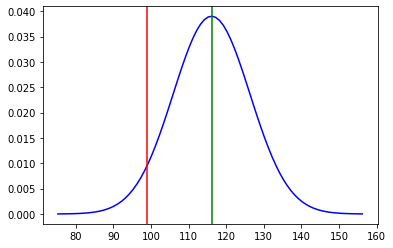

''

In [37]:
n = 1000
p = 0.1
k = 99
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()
;

Вывод:

- Нужно раздать минимум 1161 промокода, для того чтобы 100 существующих клиентов продлили подписку

#### Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, если разослать 1 млн уведомлений

Вероятность открыть сообщение: 0.15371708296369768


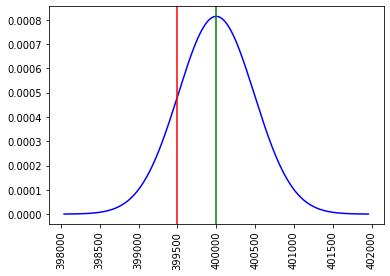

In [39]:
n = 1000000
p = 0.4
k = 399500

mu = n * p
sigma = (n * p * (1 - p))**0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открыть сообщение:', result)

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

Вывод:

- отправка 1 млн уведомлений, даст  вероятность того, что уведомление откроют не более 399,5 тыс. пользователей с вероятностью 15,37 %.

### Общий вывод

- Загружены исходные данные о пользователях сервиса аренды самокатов из 3 разных датасетов
- Пропусков в таблицах не найдено
- удалили 31 дубликат. 
- добавили столбец month с номером месяца.

Провели исследовательский анализ данных:

- Арендой самокатов пользуются больше всего в южных городах, в которых сезон проката больше, на второй позиции оказался уральский город Екатеринбург, возможно связано с проблемами с ообщественным транспортом или образом жизни людей.
- Число пользователей без подписки (free) - 54,4% превышает количество пользователей с подпиской (ultra) 45,6% на 8.8%.
- Средний возраст пользователей распределен нормально с медианой примерно в 25 лет, средний возраст и медиана практически совпадают.
- Среднее значение пройденного расстояния равно 3070м, а медианное 3133м , первый квартиль - 2543м, третий - 3776м, видим аномалию в пределах от 0-1500 м, исключить эти данные мы не можем будем анализировать и искать причины
- Средняя продолжительность поездки 17.8 минут , меданная 17.7 минут, значения довольно близкие , что также говорит о нормальности распределния, первый квартиль - 13.6 минут, третий - 21.8 минут
- Также рассчитали среднюю скорость поездки построили график распределения:
    - средняя скорость поездки 13.8 км/ч , меданная 10.3 км/ч, на графике также проявилась аномалия в области 0-5 км/ч, первый квартиль - 8.1 км/ч, третий - 12.9 км/ч
Все данные близки к нормальному распределению, есть некоторая аномалия в области данных по дистанции (0-1500), требуется дополнительный анализ причины

- Объединили данные о пользователях, поездках и тарифах в один датафрейм - all_data.
- Создали еще два датафрейма на основе all_data:
        free_subs - пользователи с бесплатным тарифом
        ultra_subs - пользователи  с платным тарифом

- Визуализировали информацию о дистанции и времени поездки для каждого тарифа.
- Для бесплатного тарифа время поездки составляет от 13 до 22 минут, и проезжают от 2.3 до 3.9 км, есть пользователи.
- Платный тариф. В основном время укладывается в промежуток от 15 до 22 минут. Пик расстояния приходится от 2.7 3.5 км.

- Создали новый датафрейм с данными total_data на основе датафрейма с объединенными данными.
- Нашли суммарное расстояние, количество поездок и суммарную длительность поездок для каждого пользователя за каждый месяц. 
- Добавили столбец с ежемесячной выручкой, от каждого пользователя.

Проверили гипотезы:

- Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
    - Отвергли нулевую гипотезу
- Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
    - Не удалось отвергнуть нулевую гипотезу
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
    - Отвергли нулевую гипотезу

Выяснили
- Нужно раздать минимум 1172 промокода, для того чтобы 100 существующих клиентов продлили подписку
- Отправка 1 млн уведомлений, даст вероятность того, что уведомление откроют не более 399,5 тыс. пользователей с вероятностью 15,37 %.